In [27]:
# Import numpy and matplotlib
from collections import namedtuple
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import simps, quad, romberg

# Modify the style of the plots
plt.style.use('seaborn-whitegrid')

# Plot comparison of concentrations for Case 1

In [3]:
# Numerical parameters for Lagrangian solution
Np      = 1000000
dt_part = 10
run     = 0

# Load particle data
ZpA = np.load(f'../results/Case1_K_A_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')
ZpB = np.load(f'../results/Case1_K_B_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')

print('Data shape Lagrangian: ', ZpA.shape)

Data shape Lagrangian:  (481, 1000000)


In [4]:
# Numerical parameters for Eulerian solution
dt_grid = 15    # Timestep
NJ      = 4000  # Number of spatial grid cells
NK      = 128   # Number of classes

# Load data, and work out grid parameters
CgA = np.load(f'../results/Case1_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt_grid}.npy').sum(axis = 1)
CgB = np.load(f'../results/Case1_K_B_block_Nclasses={NK}_NJ={NJ}_dt={dt_grid}.npy').sum(axis = 1)

print('Data shape Eulerian: ', CgA.shape)

Data shape Eulerian:  (481, 4000)


In [5]:
# Meta-variables
Tmax_part = 240*3600
Tmax_grid = 240*3600
Zmax = 50

# Number of grid cells and timesteps
Nt_grid, Nz_grid = CgA.shape
Nt_part, _ = ZpA.shape

# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
times_part = np.linspace(0, Tmax_part, Nt_part)

# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2

# Parameters for histogram for particles
Nz_part = 101
zc_part = np.linspace(0, Zmax, Nz_part + 1)
dz_part = zc_part[1] - zc_part[0]
mid_part = zc_part[:-1] + dz_part/2

(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000


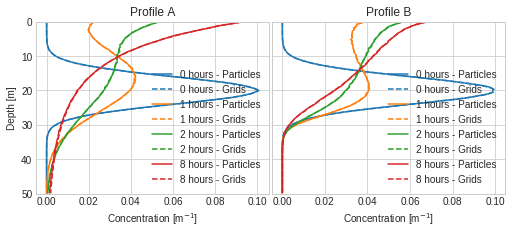

In [6]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for hours in [0, 1, 2, 8]:
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    it = np.argmin(np.abs(times_part - hours*3600))
    HA = np.histogram(ZpA[it,:][ZpA[it,:] >= 0], bins = zc_part)[0]
    HB = np.histogram(ZpB[it,:][ZpB[it,:] >= 0], bins = zc_part)[0]
    print(HA.shape, mid_part.shape)
    print(dz_part, Np)
    lA, = ax[0].plot(HA/(dz_part*Np), mid_part, label = f'{hours} hours - Particles')
    lB, = ax[1].plot(HB/(dz_part*Np), mid_part, label = f'{hours} hours - Particles')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    ax[0].plot(CgA[it,:], mid_grid, '--', c = lA.get_color(), label = f'{hours} hours - Grids')
    ax[1].plot(CgB[it,:], mid_grid, '--', c = lB.get_color(), label = f'{hours} hours - Grids')

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

ax[0].legend(fontsize = 10, loc = 'lower right')
ax[1].legend(fontsize = 10, loc = 'lower right')

#ax[0].set_xlim(-0.005, 0.11)
#ax[1].set_xlim(-0.005, 0.11)

plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
#plt.savefig('concentration_profiles_comparison_case1.pdf') 
#plt.savefig('concentration_profiles_comparison_case1.png', dpi = 240)

(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000
(101,) (101,)
0.49504950495049505 1000000


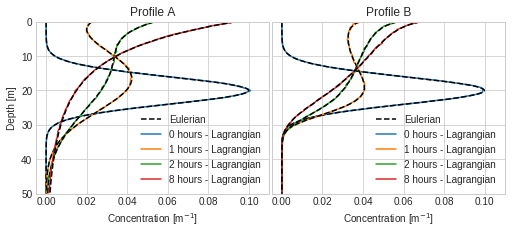

In [7]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for i, hours in enumerate([0, 1, 2, 8]):
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    it = np.argmin(np.abs(times_part - hours*3600))
    HA = np.histogram(ZpA[it,:][ZpA[it,:] >= 0], bins = zc_part)[0]
    HB = np.histogram(ZpB[it,:][ZpB[it,:] >= 0], bins = zc_part)[0]
    print(HA.shape, mid_part.shape)
    print(dz_part, Np)
    lA, = ax[0].plot(HA/(dz_part*Np), mid_part, label = f'{hours} hours - Lagrangian')
    lB, = ax[1].plot(HB/(dz_part*Np), mid_part, label = f'{hours} hours - Lagrangian')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    if i == 0:
        label = 'Eulerian'
    else:
        label = ''
    ax[0].plot(CgA[it,:], mid_grid, '--', c = 'k', label = label)
    ax[1].plot(CgB[it,:], mid_grid, '--', c = 'k', label = label)

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

#ax[0].legend(fontsize = 10, loc = 'lower right')
#ax[1].legend(fontsize = 10, loc = 'lower right')

for i in range(2):
    ax[i].set_xlim(-0.005, 0.11)
    ax[i].legend(*(
        [ x[j] for j in [1,0,2,3,4] ]
        for x in ax[i].get_legend_handles_labels()
    ), fontsize = 10, loc='lower right')


plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
#plt.savefig('concentration_profiles_comparison_case1.pdf') 
#plt.savefig('concentration_profiles_comparison_case1.png', dpi = 240)

# Case 2

In [372]:
# Numerical parameters for Eulerian solution
dt = 1.0    # Timestep
NJ = 4000  # Number of spatial grid cells
NK = 128   # Number of classes

# Load data, and work out grid parameters
CgA = np.load(f'../../data/Case2_K_A_block_Nclasses={NK+1}_NJ={NJ}_dt={dt}.npy').sum(axis = 2)
CgB = np.load(f'../../data/Case2_K_B_block_Nclasses={NK+1}_NJ={NJ}_dt={dt}.npy').sum(axis = 2)

In [373]:
Np = 100000
dt = 10

CpA = np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_0012.npy')
CpB = np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_0012.npy')

In [10]:
# Meta-variables
Tmax_part = 12*3600
Tmax_grid = 12*3600
Zmax = 50

# Number of grid cells and timesteps
Nt_grid, Nz_grid = CgA.shape
Nt_part, _ = ZpA.shape

# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
times_part = np.linspace(0, Tmax_part, Nt_part)

# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2

# Parameters for histogram for particles
Nz_part = 101
zc_part = np.linspace(0, Zmax, Nz_part + 1)
dz_part = zc_part[1] - zc_part[0]
mid_part = zc_part[:-1] + dz_part/2

NameError: name 'CpA' is not defined

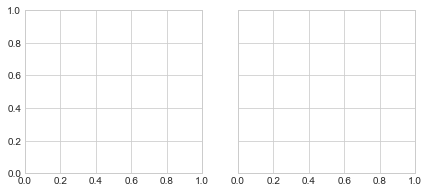

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for hours in [0, 5/60, 10/60, 15/60, 1]:
    istart = np.argmin(np.abs(times_part - hours*3600))
    Navg   = 1 # Number of timesteps to average
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    lA, = ax[0].plot(np.mean(CpA[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{int(60*hours)} minutes - Particles')
    lB, = ax[1].plot(np.mean(CpB[istart:istart + Navg,:], axis = 0)/(dz_part*Np), mid_part, label = f'{int(60*hours)} minutes - Particles')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    ax[0].plot(CgA[:,it], mid_grid, '--', c = 'k', alpha = 0.8, lw = 1.5)
    ax[1].plot(CgB[:,it], mid_grid, '--', c = 'k', alpha = 0.8, lw = 1.5)

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

ax[0].legend(fontsize = 10, loc = 'upper right')
ax[1].legend(fontsize = 10, loc = 'lower right')

ax[0].set_xlim(-0.005, 0.06)
ax[1].set_xlim(-0.005, 0.06)

plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
plt.savefig('concentration_profiles_comparison_case2.pdf')
plt.savefig('concentration_profiles_comparison_case2.png', dpi = 240)

# Case 4

In [28]:
# Numerical parameters for Eulerian solution
dt = 20.0    # Timestep
NJ = 2000  # Number of spatial grid cells
NK = 96   # Number of classes

# Load data, and work out grid parameters
CgA = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy').sum(axis = 1)
CgB = np.load(f'../results/Case4_K_B_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy').sum(axis = 1)

print('Data shape Eulerian: ', CgA.shape)

Data shape Eulerian:  (25, 2000)


In [29]:
# Numerical parameters for Lagrangian solution
Np      = 50000
dt_part = 10
run     = 0

# Load particle data
ZpA = np.load(f'../results/Case4_K_A_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')
ZpB = np.load(f'../results/Case4_K_B_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')

print('Data shape Lagrangian: ', ZpA.shape)

Data shape Lagrangian:  (25, 50000)


In [30]:
# Meta-variables
Tmax_part = 12*3600
Tmax_grid = 12*3600
Zmax = 50

# Number of grid cells and timesteps
Nt_grid, Nz_grid = CgA.shape
Nt_part, _ = ZpA.shape

# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
times_part = np.linspace(0, Tmax_part, Nt_part)

# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2

# Parameters for histogram for particles
Nz_part = 101
zc_part = np.linspace(0, Zmax, Nz_part + 1)
dz_part = zc_part[1] - zc_part[0]
mid_part = zc_part[:-1] + dz_part/2

(101,) (101,)
0.49504950495049505 50000
(101,) (101,)
0.49504950495049505 50000
(101,) (101,)
0.49504950495049505 50000
(101,) (101,)
0.49504950495049505 50000


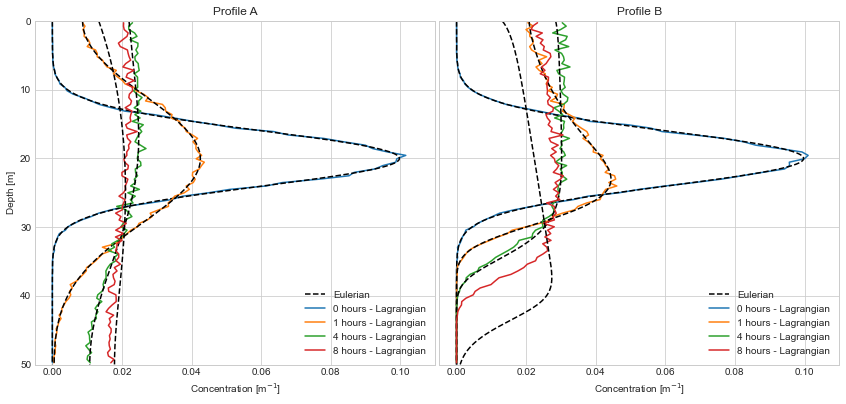

In [31]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 6), sharey = True)

# Plot at different times:
#for hours in [0, 0.5, 1, 12]:
for i, hours in enumerate([0, 1, 4, 8]):
    # Plot concentration profiles, normalised such that
    # the integral of the profile is 1 if everything is submerged
    it = np.argmin(np.abs(times_part - hours*3600))
    HA = np.histogram(ZpA[it,:][ZpA[it,:] >= 0], bins = zc_part)[0]
    HB = np.histogram(ZpB[it,:][ZpB[it,:] >= 0], bins = zc_part)[0]
    print(HA.shape, mid_part.shape)
    print(dz_part, Np)
    lA, = ax[0].plot(HA/(dz_part*Np), mid_part, label = f'{hours} hours - Lagrangian')
    lB, = ax[1].plot(HB/(dz_part*Np), mid_part, label = f'{hours} hours - Lagrangian')
    
    it = np.argmin(np.abs(times_grid - hours*3600))
    if i == 0:
        label = 'Eulerian'
    else:
        label = ''
    ax[0].plot(CgA[it,:], mid_grid, '--', c = 'k', label = label)
    ax[1].plot(CgB[it,:], mid_grid, '--', c = 'k', label = label)

# Flip the vertical axis
ax[0].set_ylim(50, 0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Concentration [m$^{-1}$]')
ax[1].set_xlabel('Concentration [m$^{-1}$]')

ax[0].set_title('Profile A')
ax[1].set_title('Profile B')

#ax[0].legend(fontsize = 10, loc = 'lower right')
#ax[1].legend(fontsize = 10, loc = 'lower right')

for i in range(2):
    ax[i].set_xlim(-0.005, 0.11)
    ax[i].legend(*(
        [ x[j] for j in [1,0,2,3,4] ]
        for x in ax[i].get_legend_handles_labels()
    ), fontsize = 10, loc='lower right')


plt.subplots_adjust(left = 0.06, bottom = 0.13, right = 0.991, top = 0.925, wspace = 0.01)
#plt.savefig('concentration_profiles_comparison_case1.pdf') 
#plt.savefig('concentration_profiles_comparison_case1.png', dpi = 240)

In [134]:
# Numerical parameters for Eulerian solution
dt = 60.0    # Timestep
NJ = 2000  # Number of spatial grid cells
NK = 32   # Number of classes

# Load data, and work out grid parameters
CgA_full = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
CgB_full = np.load(f'../results/Case4_K_B_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')

print('Data shape Eulerian: ', CgA_full.shape)

Data shape Eulerian:  (49, 32, 2000)


(-0.01, 1.01)

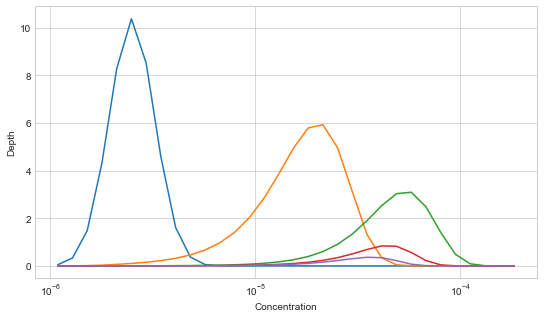

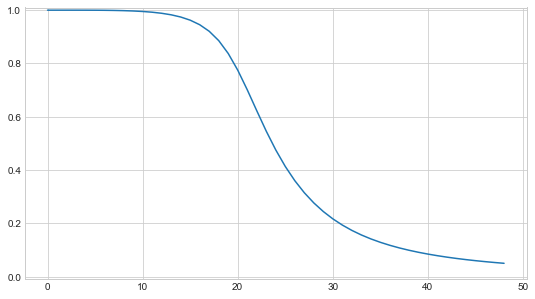

In [136]:
# Smallest and largest particle size
Dmin = 1e-6
Dmax = 2e-4
# Size class "cell" faces
Rf = np.logspace(np.log10(Dmin), np.log10(Dmax), CgA_full.shape[1]+1)
# Size class "cell" centers
Rc = np.sqrt(Rf[:-1]*Rf[1:])

fig = plt.figure(figsize = (9, 5))

for it in [0, 12, 24, 36, 48]:
    plt.plot(Rc, np.sum(CgA_full[it,:,:], axis = -1), label = it)

plt.xscale('log')
plt.ylabel('Depth')
plt.xlabel('Concentration')

fig = plt.figure(figsize = (9, 5))

plt.plot(np.sum(CgA_full, axis = (1,2))*dz_grid)
plt.ylim(-0.01, 1.01)

(-0.01, 1.01)

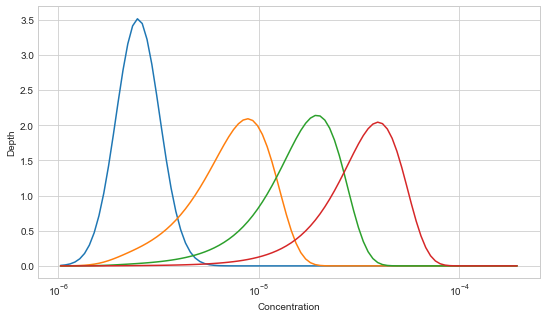

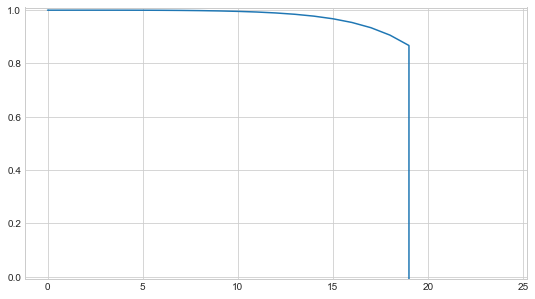

In [124]:
# Smallest and largest particle size
Dmin = 1e-6
Dmax = 2e-4
# Size class "cell" faces
Rf = np.logspace(np.log10(Dmin), np.log10(Dmax), CgA_full.shape[1]+1)
# Size class "cell" centers
Rc = np.sqrt(Rf[:-1]*Rf[1:])

fig = plt.figure(figsize = (9, 5))

for it in [0, 6, 12, 18]:
    plt.plot(Rc, np.sum(CgA_full[it,:,:], axis = -1), label = it)

plt.xscale('log')
plt.ylabel('Depth')
plt.xlabel('Concentration')

fig = plt.figure(figsize = (9, 5))

plt.plot(np.sum(CgA_full, axis = (1,2))*dz_grid)
plt.ylim(-0.01, 1.01)

(-0.01, 1.01)

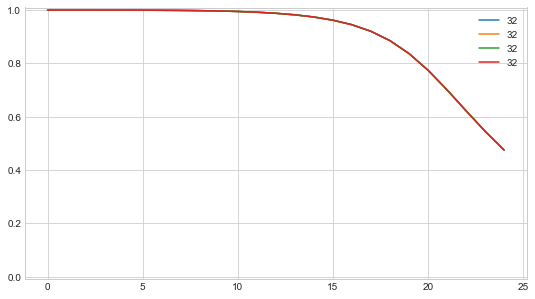

In [133]:
# Numerical parameters for Eulerian solution
dt = 20.0    # Timestep
NJ = 2000  # Number of spatial grid cells
NK = 32


fig = plt.figure(figsize = (9, 5))

for dt in [5.0, 10.0, 20.0, 60.0]:
    # Load data
    CgA_full = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')

    plt.plot(np.sum(CgA_full, axis = (1,2))*dz_grid, label = NK)

plt.legend()
plt.ylim(-0.01, 1.01)

(-0.01, 1.01)

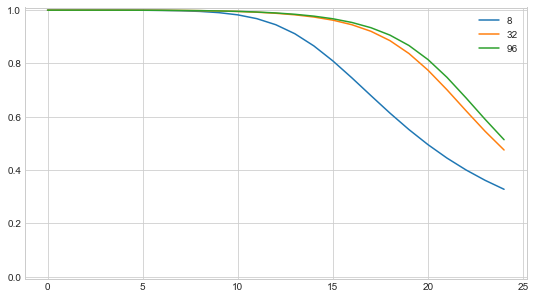

In [32]:
# Numerical parameters for Eulerian solution
dt = 20.0    # Timestep
NJ = 2000  # Number of spatial grid cells


fig = plt.figure(figsize = (9, 5))

for NK in [8, 32, 96]:
    # Load data
    CgA_full = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')

    plt.plot(np.sum(CgA_full, axis = (1,2))*dz_grid, label = NK)

plt.legend()
plt.ylim(-0.01, 1.01)

In [13]:
# Numerical parameters for Eulerian solution
dt = 60.0    # Timestep
NJ = 2000  # Number of spatial grid cells
NK = 32   # Number of classes

# Load data, and work out grid parameters
CgA_full_lo = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}_tol=0.0001.npy')
CgA_full_hi = np.load(f'../results/Case4_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')

print('Data shape Eulerian: ', CgA_full_lo.shape)

Data shape Eulerian:  (49, 32, 2000)


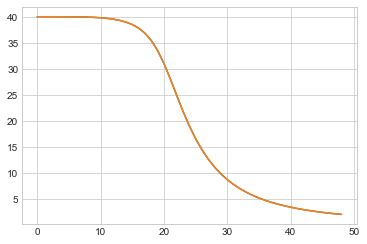

In [15]:
plt.plot(np.sum(CgA_full_lo, axis = (1,2)))
plt.plot(np.sum(CgA_full_hi, axis = (1,2)))

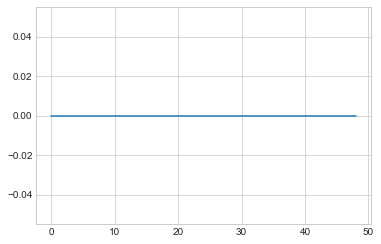

In [19]:
zf, dz = np.linspace(0, 50, CgA_full_lo.shape[-1]+1, retstep = True)
zc = zf[1:] - dz/2

moment_lo = dz*np.sum(np.sum(CgA_full_lo, axis = 1)*zc, axis = -1)
moment_hi = dz*np.sum(np.sum(CgA_full_hi, axis = 1)*zc, axis = -1)

plt.plot(moment_lo - moment_hi)

(0.0, 1.0)

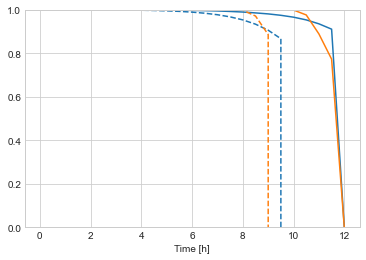

In [109]:

l, = plt.plot(times_part/3600, np.sum(ZpA >= 0, axis = 1) / Np)
plt.plot(times_grid/3600, np.sum(CgA, axis = 1)*dz_grid, '--', c = l.get_color())

l, = plt.plot(times_part/3600, np.sum(ZpB >= 0, axis = 1) / Np)
plt.plot(times_grid/3600, np.sum(CgB, axis = 1)*dz_grid, '--', c = l.get_color())

plt.xlabel('Time [h]')

plt.ylim(0, 1)

Text(0.5, 0, 'Time [h]')

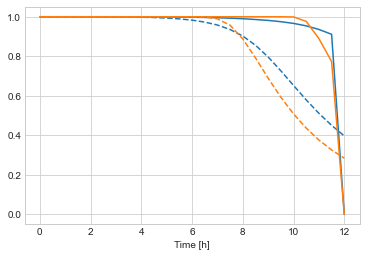

In [51]:

l, = plt.plot(times_part/3600, np.sum(ZpA >= 0, axis = 1) / Np)
plt.plot(times_grid/3600, np.sum(CgA, axis = 1)*dz_grid, '--', c = l.get_color())

l, = plt.plot(times_part/3600, np.sum(ZpB >= 0, axis = 1) / Np)
plt.plot(times_grid/3600, np.sum(CgB, axis = 1)*dz_grid, '--', c = l.get_color())


plt.xlabel('Time [h]')

# Case 4

In [4]:
# Numerical parameters for Lagrangian solution
Np      = 10000
dt_part = 10
run     = 0

# Load particle data
ZpA = np.load(f'../results/Case4_K_A_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')
ZpB = np.load(f'../results/Case4_K_B_lagrangian_Nparticles={Np}_dt={dt_part}_Z_{run:04}.npy')
DpA = np.load(f'../results/Case4_K_A_lagrangian_Nparticles={Np}_dt={dt_part}_D_{run:04}.npy')
DpB = np.load(f'../results/Case4_K_B_lagrangian_Nparticles={Np}_dt={dt_part}_D_{run:04}.npy')

print('Data shape Lagrangian: ', ZpA.shape)

Data shape Lagrangian:  (25, 10000)


# Old stuff below here

/Users/torn/.conda/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/torn/.conda/envs/default/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


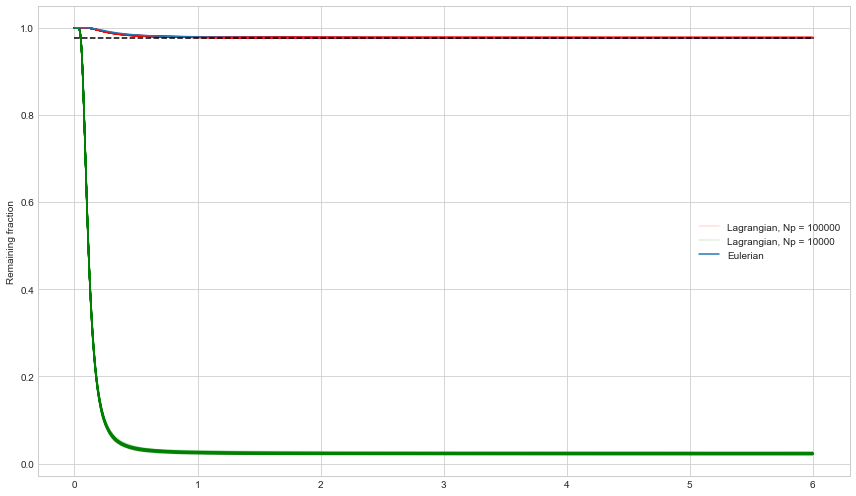

In [354]:
fig = plt.figure(figsize = (12,7))

Np = 100000
dt = 30

for i in range(100):
    CpA = np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    CpB = np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    # Number of grid cells and timesteps
    Nt_part, Nz_part = CpA.shape
    # Time values
    times_part = np.linspace(0, Tmax_part, Nt_part)

    if i ==0:
        plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1), c = 'r', alpha = 0.125, label = f'Lagrangian, Np = {Np}')
    else:
        plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1), c = 'r', alpha = 0.125)
        

Np = 10000
dt = 10

for i in range(100):
    CpA = np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    CpB = np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    # Number of grid cells and timesteps
    Nt_part, Nz_part = CpA.shape
    # Time values
    times_part = np.linspace(0, Tmax_part, Nt_part)

    if i ==0:
        plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1), c = 'g', alpha = 0.125, label = f'Lagrangian, Np = {Np}')
    else:
        plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1), c = 'g', alpha = 0.125)        

plt.plot(times_grid / 3600, dz_grid*np.sum(CgA, axis = 0), label = 'Eulerian')
plt.plot(times_grid / 3600, 0.9768992327901018*np.ones_like(times_grid), '--', c = 'k')
plt.ylabel('Remaining fraction')
plt.legend()
plt.tight_layout()

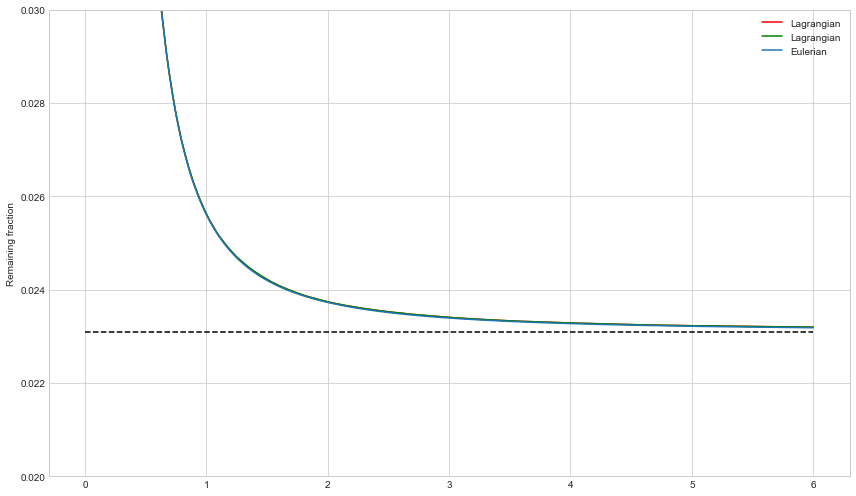

In [370]:
fig = plt.figure(figsize = (12,7))

Np = 100000
dt = 10

for i in range(100):
    if i == 0:
        CpA = np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
        CpB = np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    else:
        CpA += np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
        CpB += np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    # Number of grid cells and timesteps
    Nt_part, Nz_part = CpA.shape
    # Time values
    times_part = np.linspace(0, Tmax_part, Nt_part)
    
plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1)/100, c = 'r', label = 'Lagrangian')

Np = 100000
dt = 10

for i in range(100):
    if i == 0:
        CpA = np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
        CpB = np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    else:
        CpA += np.load(f'../../data/Case2_K_A_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
        CpB += np.load(f'../../data/Case2_K_B_Lagrangian_concentration_Np={Np}_dt={dt}_{i:04}.npy')
    # Number of grid cells and timesteps
    Nt_part, Nz_part = CpA.shape
    # Time values
    times_part = np.linspace(0, Tmax_part, Nt_part)
    
plt.plot(times_part / 3600, np.sum(CpA/Np, axis = 1)/100, c = 'g', label = 'Lagrangian')

plt.plot(times_grid / 3600, dz_grid*np.sum(CgA, axis = 0), label = 'Eulerian')
plt.plot(times_grid / 3600, (1-0.9768992327901018)*np.ones_like(times_grid), '--', c = 'k')
plt.ylabel('Remaining fraction')
plt.ylim(0.02, 0.03)
plt.legend()
plt.tight_layout()

In [19]:
(50 / 2000) * 0.33 / 0.01

0.8250000000000001

In [20]:
0.33 * 100 / (50 / 2000)

1320.0

In [44]:
C.shape

(4000, 37, 512)

(0, 0.1)

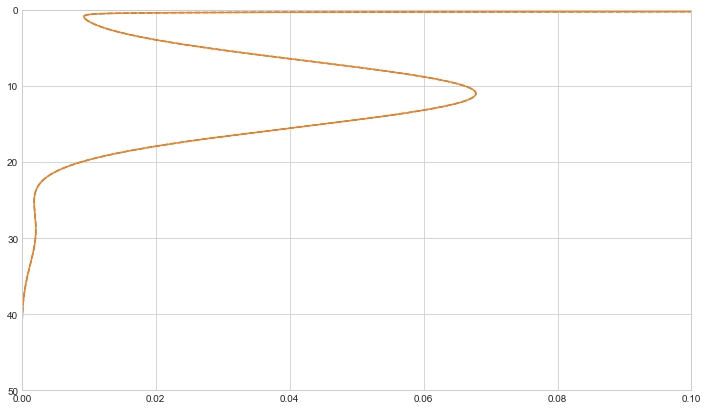

In [63]:
fig = plt.figure(figsize = (12, 7))


for dt in [1, 0.1]:
    C = np.sum(np.load(f'../../data/Case2_K_A_block_Nclasses=4_NJ=4000_dt={dt}.npy'), axis = 2)

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = CgA.shape
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    if dt == 1:
        plt.plot(C[:,3], mid_grid, '--')
    else:
        plt.plot(C[:,3], mid_grid)
    
plt.ylim(50, 0)
plt.xlim(0, 0.1)

NJ = 4000   moment = 0.16944516787614036
NJ = 4000   moment = 0.1735270709941477
NJ = 4000   moment = 0.1690782902111146


(0.1, 0.2)

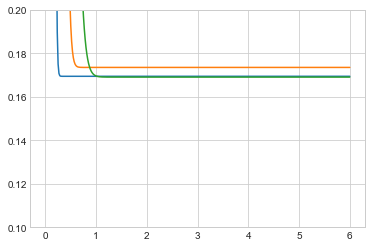

In [83]:


dt = 1.0
NJ = 4000

for NK in [4, 8, 12]:
    C = np.sum(np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy'), axis = 2)

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2
    
    plt.plot(times_grid / 3600, np.sum(mid_grid[:,None]*C[:,:], axis = 0) / np.sum(C[:,:], axis = 0))
    it = -1
    print('NJ =', NJ, '  moment =', np.sum(mid_grid*C[:,it]) / np.sum(C[:,it]))
    
plt.ylim(0.1, 0.2)
#plt.xlim(0, 1)

Total moment numerical (upwards speeds only): 0.1654335421796938
Total moment theoretical (upwards speeds only): 1.315720972731656
Total moment numerical (upwards speeds only): 0.16941459124778674
Total moment theoretical (upwards speeds only): 1.3155511884805204
Total moment numerical (upwards speeds only): 0.16506850656997019
Total moment theoretical (upwards speeds only): 1.3088289271947284
Total moment numerical (upwards speeds only): 0.16317426558756354
Total moment theoretical (upwards speeds only): 1.3057744066074581
Total moment numerical (upwards speeds only): 0.16168374392420515
Total moment theoretical (upwards speeds only): 1.3033094209691953
Total moment numerical (upwards speeds only): 0.16113009891653182
Total moment theoretical (upwards speeds only): 1.3023779946394634
Total moment numerical (upwards speeds only): 0.1608734753181416
Total moment theoretical (upwards speeds only): 1.3016804085263745


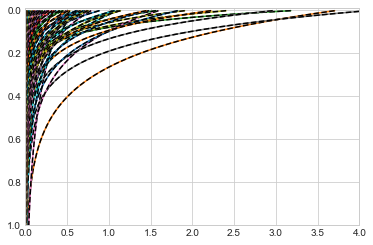

In [166]:


dt = 1.0
NJ = 8000

errors = []
moments_theoretical = []
moments_numerical = []
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64])
NKs = np.array([4, 8, 12, 16, 24, 32, 48])



for NK in NKs:

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    K = 1e-2
    it = -1

    total_moment_numerical = 0
    total_moment_theoretical = 0

    for i in range(NK):
        plt.plot(C[:,it,i], mid_grid)
        C0 = fractions[i]*(speeds[i]/K)*1/(1 - np.exp(-Zmax*speeds[i]/K))
        fC = lambda z : C0*np.exp(-z*speeds[i]/K)
        fCz = lambda z : z*C0*np.exp(-z*speeds[i]/K)
        plt.plot(fC(mid_grid), mid_grid, '--', c = 'k')
#        print(f'Total mass for class {i}:         ', dz_grid*np.sum(C[:,it,i]))
#        print(f'Moment for class {i}:             ', dz_grid*np.sum(mid_grid*C[:,it,i]) / (dz_grid*np.sum(C[:,it,i])))
#        print(f'Theoretical moment for class {i}: ', quad(fCz, 0, 50)[0] / quad(fC, 0, 50)[0])
#        print()
        if speeds[i] > -1000:
            total_moment_numerical += dz_grid*np.sum(mid_grid*C[:,it,i])
            total_moment_theoretical += fractions[i] * quad(fCz, 0, 50)[0] / quad(fC, 0, 50)[0]

    plt.ylim(1, -0.01)
    plt.xlim(-0.01, 4)

    print('Total moment numerical (upwards speeds only):', total_moment_numerical)
    print('Total moment theoretical (upwards speeds only):', total_moment_theoretical)
    
    moments_numerical.append(total_moment_numerical)
    moments_theoretical.append(total_moment_theoretical)
    ref = total_moment_theoretical
    ref = total_moment_numerical
    errors.append(total_moment_numerical - total_moment_theoretical)
    
errors = np.array(errors)

([<matplotlib.axis.XTick at 0x7faf6f53e160>,
 <a list of 7 Text xticklabel objects>)

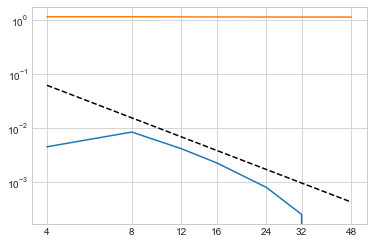

In [167]:
plt.plot(NKs, np.abs(moments_numerical - ref))
plt.plot(NKs, np.abs(moments_theoretical - ref))
plt.xscale('log')
plt.yscale('log')
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xticks(NKs, NKs)

([<matplotlib.axis.XTick at 0x7fb0ff3f76a0>,
 <a list of 8 Text xticklabel objects>)

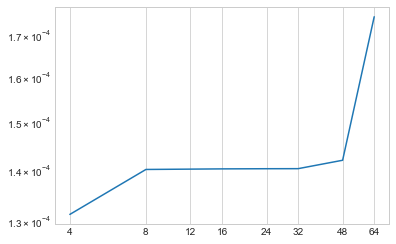

In [153]:
plt.plot(NKs, np.abs(errors))
plt.xscale('log')
plt.yscale('log')

plt.xticks(NKs, NKs)

([<matplotlib.axis.XTick at 0x7fb0f43c1240>,
 <a list of 6 Text xticklabel objects>)

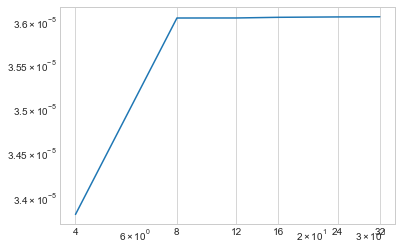

In [150]:
plt.plot(NKs, np.abs(errors))
plt.xscale('log')
plt.yscale('log')

plt.xticks(NKs, NKs)

Speed for class 3:               0.24999999999999997
Total mass for class 3:          0.002318902127504477
Moment for class 3:              0.04041851025231052
Theoretical moment for class 3:  0.039999999999999994
Error:                             0.0004185102523105236

Total moment numerical (upwards speeds only): 4.056647059942703
Total moment theoretical (upwards speeds only): 0.16539971963456826


Speed for class 7:               0.27499999999999997
Total mass for class 7:          0.0002660228323360502
Moment for class 7:              0.0368171433410724
Theoretical moment for class 7:  0.03636363636363634
Error:                             0.000453506977436062

Total moment numerical (upwards speeds only): 2.9851619815875416
Total moment theoretical (upwards speeds only): 0.16937853607607353


Speed for class 11:               0.2833333333333333
Total mass for class 11:          0.00011947347806254636
Moment for class 11:              0.03575904725815751
Theoretical moment for cl

/Users/torn/.conda/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:52: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/Users/torn/.conda/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:47: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/Users/torn/.conda/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:48: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Speed for class 511:               0.29960937499999996
Total mass for class 511:          1.4101593395413683e-06
Moment for class 511:              0.033863690063942305
Theoretical moment for class 511:  0.03337679678896843
Error:                             0.0004868932749738722

Total moment numerical (upwards speeds only): 2.720708565773888
Total moment theoretical (upwards speeds only): 0.16020063432563797




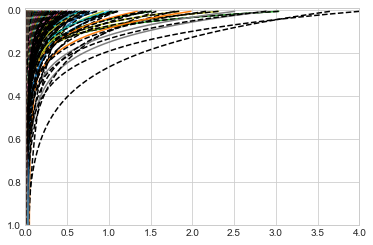

In [281]:


dt = 1.0
NJ = 4000

errors = []
moments_theoretical = []
moments_numerical = []
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64])
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 512])

mass = []

for NK in NKs:

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    K = 1e-2
    it = 5
    
    mass.append(dz_grid*np.sum(C[:,it,:]))

    total_moment_numerical = 0
    total_moment_theoretical = 0

    for i in range(NK):
        plt.plot(C[:,it,i], mid_grid)
        C0 = fractions[i]*(speeds[i]/K)*1/(1 - np.exp(-Zmax*speeds[i]/K))
        fC = lambda z : C0*np.exp(-z*speeds[i]/K)
        fCz = lambda z : z*C0*np.exp(-z*speeds[i]/K)
        plt.plot(fC(mid_grid), mid_grid, '--', c = 'k')
        if i == NK - 1:
            print(f'Speed for class {i}:              ', speeds[i])
            print(f'Total mass for class {i}:         ', dz_grid*np.sum(C[:,it,i]))
            print(f'Moment for class {i}:             ', dz_grid*np.sum(mid_grid*C[:,it,i]) / (dz_grid*np.sum(C[:,it,i])))
            print(f'Theoretical moment for class {i}: ', quad(fCz, 0, 50)[0] / quad(fC, 0, 50)[0])
            print(f'Error:                            ', np.abs(dz_grid*np.sum(mid_grid*C[:,it,i]) / (dz_grid*np.sum(C[:,it,i])) -quad(fCz, 0, 50)[0] / quad(fC, 0, 50)[0] ))
            print()
        if speeds[i] > 0:
            total_moment_numerical += dz_grid*np.sum(mid_grid*C[:,it,i])
            total_moment_theoretical += fractions[i] * quad(fCz, 0, 50)[0] / quad(fC, 0, 50)[0]

    plt.ylim(1, -0.01)
    plt.xlim(-0.01, 4)

    print('Total moment numerical (upwards speeds only):', total_moment_numerical)
    print('Total moment theoretical (upwards speeds only):', total_moment_theoretical)
    print()
    print()
    
    moments_numerical.append(total_moment_numerical)
    moments_theoretical.append(total_moment_theoretical)
    ref_theoretical = total_moment_theoretical
    ref_numerical = total_moment_numerical
    errors.append(total_moment_numerical - total_moment_theoretical)
    
errors = np.array(errors)

No handles with labels found to put in legend.


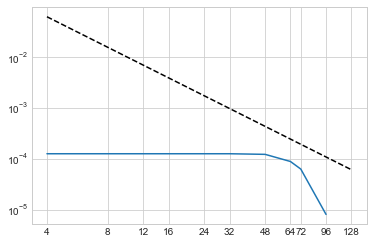

In [260]:
plt.plot(NKs[:-1], np.abs(mass[:-1] - mass[-1]))

plt.xscale('log')
plt.yscale('log')
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xticks(NKs, NKs)
plt.legend()

No handles with labels found to put in legend.


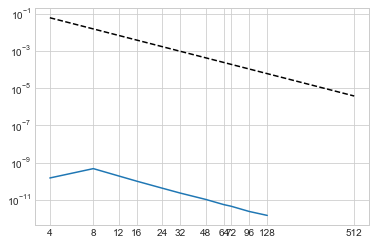

In [271]:
plt.plot(NKs[:-1], np.abs(mass[:-1] - mass[-1]))

plt.xscale('log')
plt.yscale('log')
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xticks(NKs, NKs)
plt.legend()

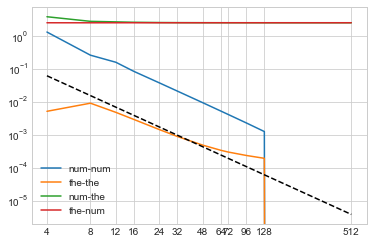

In [282]:
plt.plot(NKs, np.abs(moments_numerical - ref_numerical), label = 'num-num')
plt.plot(NKs, np.abs(moments_theoretical - ref_theoretical), label = 'the-the')

plt.plot(NKs, np.abs(moments_numerical - ref_theoretical), label = 'num-the')
plt.plot(NKs, np.abs(moments_theoretical - ref_numerical), label = 'the-num')

plt.xscale('log')
plt.yscale('log')
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xticks(NKs, NKs)
plt.legend()

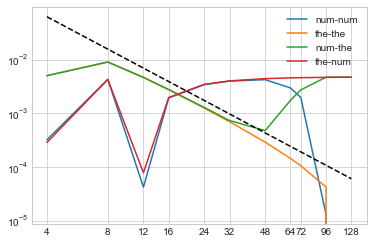

In [183]:
plt.plot(NKs, np.abs(moments_numerical - ref_numerical), label = 'num-num')
plt.plot(NKs, np.abs(moments_theoretical - ref_theoretical), label = 'the-the')

plt.plot(NKs, np.abs(moments_numerical - ref_theoretical), label = 'num-the')
plt.plot(NKs, np.abs(moments_theoretical - ref_numerical), label = 'the-num')

plt.xscale('log')
plt.yscale('log')
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xticks(NKs, NKs)
plt.legend()

In [251]:
dt = 1.0
NJ = 8000

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128])
moments1 = []
moments2 = []
moments3 = []

for NK in NKs:

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    it = -1

    moments_per_class = np.zeros(NK)
    upwards_moments_per_class = np.zeros(NK)

    
    total_moment = dz_grid*np.sum(mid_grid*np.sum(C[:,it,:], axis = 1)) / (dz_grid*np.sum(C[:,it,:]))
    for i in range(NK):
        moments_per_class[i] = dz_grid*np.sum(mid_grid*C[:,it,i]) * (1/(dz_grid*np.sum(C[:,it,:])))
        if speeds[i] > 0:
            upwards_moments_per_class[i] = dz_grid*np.sum(mid_grid*C[:,it,i]) * (1/(dz_grid*np.sum(C[:,it,:])))

    print(total_moment)
    print(sum(moments_per_class))
    print()
    moments1.append(total_moment)
    moments2.append(sum(moments_per_class))
    moments3.append(sum(upwards_moments_per_class))
    
moments1 = np.array(moments1)
moments2 = np.array(moments2)
moments3 = np.array(moments3)

0.16934526559872262
0.1693452655987226

0.17342044771150344
0.17342044771150342

0.16897159862138125
0.16897159862138125

0.16703256776797243
0.1670325677679724

0.16550680229425496
0.16550680229425493

0.16494006603870015
0.1649400660387002

0.16467679127441037
0.16467679127441043

0.165963211529014
0.16596321152901397

0.16697497297848932
0.16697497297848923

0.168981354880189
0.16898135488018898

0.16899354548211845
0.16899354548211845



0.07036101741162262 0.9999999999999999
0.07548249213564179 1.0
0.07548828232514719 1.0000000000000002
0.07549491381555706 1.0000000000000002
0.07549521527158595 1.0
0.07549548744030118 1.0
0.07549554195818972 0.9999999999999999
0.07549559071574866 1.0
0.07549565700006433 1.0
0.07549559339720614 1.0
0.0754956135855325 1.0
0.07549561953012227 1.0


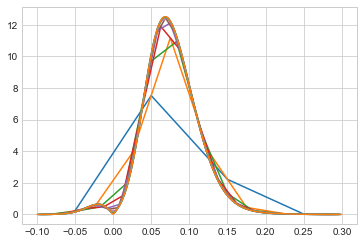

In [229]:
dt = 1.0
NJ = 8000

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 512])
diff = []

for NK in NKs:

    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')
    
    plt.plot(speeds, fractions/(speeds[1]-speeds[0]))
    print(np.sum((speeds * fractions)), np.sum(fractions))
    diff.append(np.sum((speeds * fractions)))
    
diff = np.array(diff) - diff[-1]

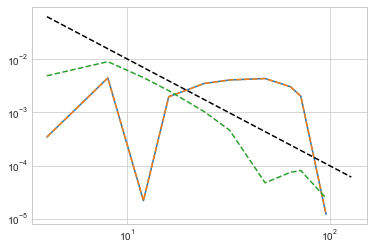

In [250]:
plt.plot(NKs[:-1], np.abs(moments1[:-1] - moments1[-1]))
plt.plot(NKs[:-1], np.abs(moments2[:-1] - moments2[-1]), '--')
plt.plot(NKs[:-1], np.abs(moments3[:-1] - moments3[-1]), '--')
#plt.plot(NKs[:-1], np.abs(diff[:-1]))
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xscale('log')
plt.yscale('log')

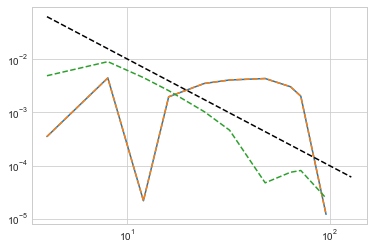

In [252]:
plt.plot(NKs[:-1], np.abs(moments1[:-1] - moments1[-1]))
plt.plot(NKs[:-1], np.abs(moments2[:-1] - moments2[-1]), '--')
plt.plot(NKs[:-1], np.abs(moments3[:-1] - moments3[-1]), '--')
#plt.plot(NKs[:-1], np.abs(diff[:-1]))
plt.plot(NKs, 1/NKs**2, '--', c = 'k')
plt.xscale('log')
plt.yscale('log')

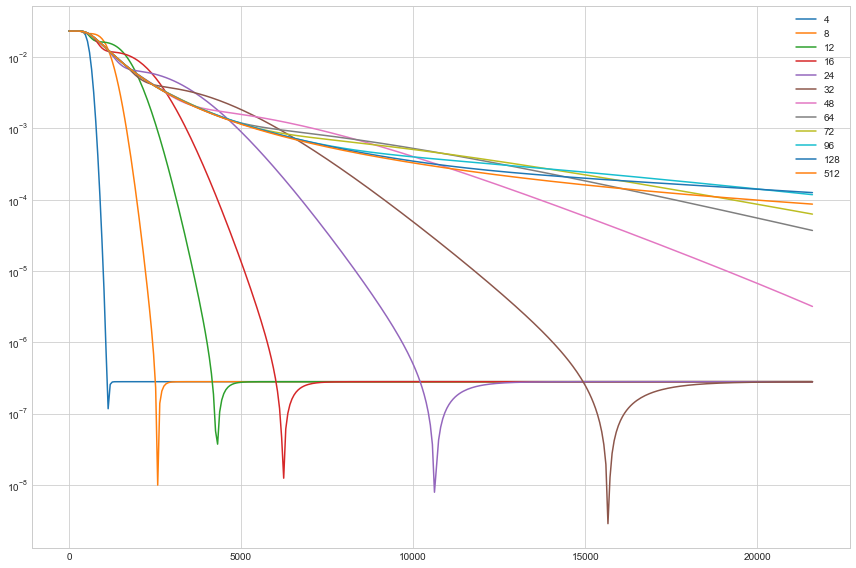

In [266]:
dt = 1.0
NJ = 4000

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 512])

fig = plt.figure(figsize = (12, 8))

for NK in NKs:

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')
    

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

#    if NK == NKs[0]:
#        plt.plot(times_grid, np.sum(fractions[speeds>0])*np.ones_like(times_grid), '--', c = 'k')

    plt.plot(times_grid, np.abs(np.sum(fractions[speeds>0]) - dz_grid*np.sum(C[:,:,:], axis = (0,2))), label = NK)
    
plt.yscale('log')
    
plt.legend()
plt.tight_layout()

In [ ]:
dt = 1.0
NJ = 4000

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 512])

fig = plt.figure(figsize = (12, 8))

for NK in NKs:

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')
    

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

#    if NK == NKs[0]:
#        plt.plot(times_grid, np.sum(fractions[speeds>0])*np.ones_like(times_grid), '--', c = 'k')

    plt.plot(times_grid, np.abs(np.sum(fractions[speeds>0]) - dz_grid*np.sum(C[:,:,:], axis = (0,2))), label = NK)
    
plt.yscale('log')
    
plt.legend()
plt.tight_layout()

In [278]:
NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 512])

NKs = np.array([4, 8, 16, 32, 64, 128])

for NK in NKs:
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')

    print([speeds[i]*fractions[i] + speeds[i+1]*fractions[i+1] for i in range(0, NK, 2)])
    print()
    print(fractions*speeds)

[0.036470613382302466, 0.033890404029320156]

[-0.00115494  0.03762555  0.03331068  0.00057973]
[-0.0006658136415870022, 0.04674777249414873, 0.02886547900940078, 0.000535054273679279]

[-1.32514700e-04 -5.33298942e-04  4.84527955e-03  4.19024929e-02
  2.49924476e-02  3.87303140e-03  4.61897974e-04  7.31562999e-05]
[-0.00011366305415519105, -0.0005027840445474202, 0.006531755898880039, 0.0414452219497872, 0.023893283077576002, 0.0037201292702790313, 0.00044927936043537845, 7.169135730201881e-05]

[-1.13194827e-05 -1.02343572e-04 -3.54201860e-04 -1.48582184e-04
  3.68081715e-04  6.16367418e-03  1.86025495e-02  2.28426724e-02
  1.61928418e-02  7.70044126e-03  2.79205699e-03  9.28072277e-04
  3.25376701e-04  1.23902659e-04  5.02974036e-05  2.13939537e-05]
[-1.0851055378615268e-05, -9.691783807952961e-05, -0.00033549307125937223, -0.00017253213301517898, 0.0004848276737018623, 0.006448360366503438, 0.018684905856761656, 0.02267681747481832, 0.016014924148091726, 0.007605856678561682, 0.002

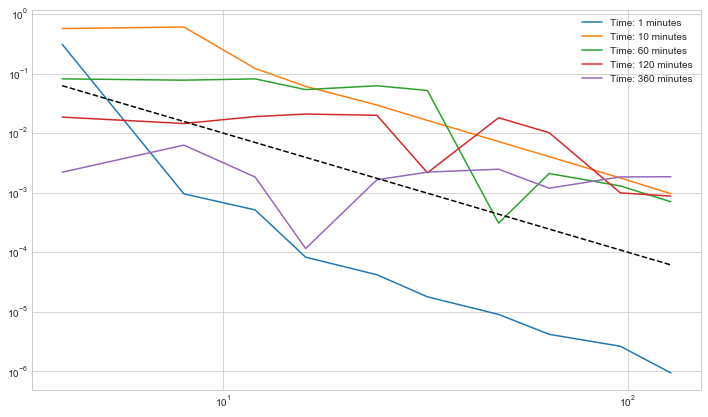

In [328]:
dt = 1.0
NJ = 8000
K = 1e-2
it = 5

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 96, 128, 512])
timesteps = np.array([1, 10, 60, 120, 360])
moments_numerical = np.zeros((len(NKs), len(timesteps)))

for i, NK in enumerate(NKs):

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    for j, it in enumerate(timesteps):
        moments_numerical[i,j] = np.sum(mid_grid*np.sum(C[:,it,:], axis = 1)) / np.sum(C[:,it,:])


        
fig = plt.figure(figsize = (12,7))
for j, it in enumerate(timesteps):
    plt.plot(NKs[:-1], np.abs(moments_numerical[:-1,j] - moments_numerical[-1,j]), label = f'Time: {it} minutes')

        
plt.plot(NKs[:-1], 1/NKs[:-1]**2, '--', c = 'k')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.savefig(f'convergence_{NJ}.pdf')


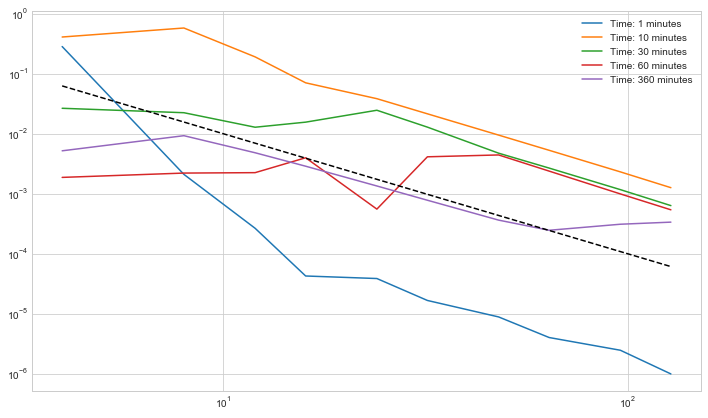

In [329]:
dt = 1.0
NJ = 8000
K = 1e-2
it = 5

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 96, 128, 512])
timesteps = np.array([1, 10, 30, 60, 360])
moments_numerical = np.zeros((len(NKs), len(timesteps)))

for i, NK in enumerate(NKs):

    C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    for j, it in enumerate(timesteps):
        moments_numerical[i,j] = np.sum(mid_grid*np.sum(C[:,it,speeds>0], axis = 1)) / np.sum(C[:,it,speeds>0])


fig = plt.figure(figsize = (12,7))
for j, it in enumerate(timesteps):
    plt.plot(NKs[:-1], np.abs(moments_numerical[:-1,j] - moments_numerical[-1,j]), label = f'Time: {it} minutes')

        
plt.plot(NKs[:-1], 1/NKs[:-1]**2, '--', c = 'k')

plt.xscale('log')
plt.yscale('log')
plt.legend()



(0.1, 0)

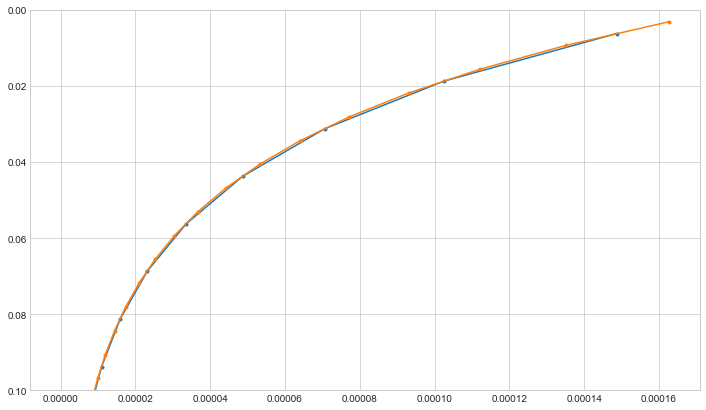

In [331]:
fig = plt.figure(figsize = (12,7))



NK = 128
NJ = 4000

C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
# Number of grid cells and timesteps
Nz_grid, Nt_grid = C.shape[:2]
# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2


plt.plot(C[:,-1,-1], mid_grid, marker = '.')


NK = 128
NJ = 8000
C = np.load(f'../../data/Case2_K_A_block_Nclasses={NK}_NJ={NJ}_dt={dt}.npy')
# Number of grid cells and timesteps
Nz_grid, Nt_grid = C.shape[:2]
# Time values
times_grid = np.linspace(0, Tmax_grid, Nt_grid)
# Concentration grid cells (in z-direction)
zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
dz_grid = zc_grid[1] - zc_grid[0]
mid_grid = zc_grid[:-1] + dz_grid/2

plt.plot(C[:,-1,-1], mid_grid, marker = '.')


plt.ylim(0.1, 0)

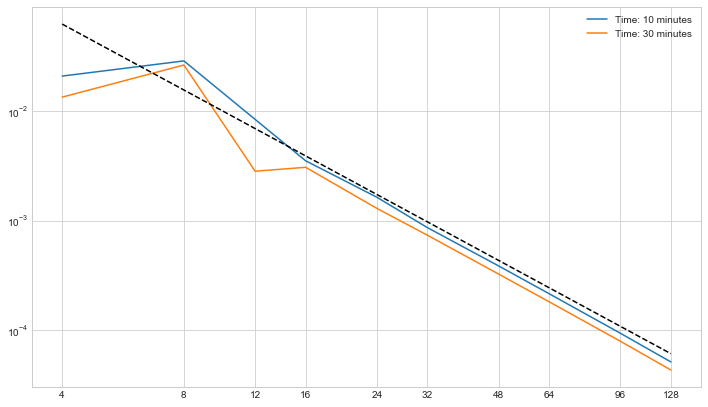

In [333]:
dt = 1.0
NJ = 4000
K = 1e-2
it = 5

NKs = np.array([4, 8, 12, 16, 24, 32, 48, 64, 96, 128])
timesteps = np.array([1, 10, 30, 60, 360])
timesteps = np.array([10, 30])
errors = np.zeros((len(NKs), len(timesteps)))

NKref = 512
Cref = np.sum(np.load(f'../../data/Case2_K_A_block_Nclasses={NKref+1}_NJ={NJ}_dt={dt}.npy'), axis = 2)

for i, NK in enumerate(NKs):

    C = np.sum( np.load(f'../../data/Case2_K_A_block_Nclasses={NK+1}_NJ={NJ}_dt={dt}.npy'), axis = 2)
#    speeds = np.load(f'../../data/Case2_speeds_Nclasses={NK+1}.npy')
    fractions = np.load(f'../../data/Case2_fractions_Nclasses={NK+1}.npy')

    # Number of grid cells and timesteps
    Nz_grid, Nt_grid = C.shape[:2]
    # Time values
    times_grid = np.linspace(0, Tmax_grid, Nt_grid)
    # Concentration grid cells (in z-direction)
    zc_grid = np.linspace(0, Zmax, Nz_grid + 1)
    dz_grid = zc_grid[1] - zc_grid[0]
    mid_grid = zc_grid[:-1] + dz_grid/2

    for j, it in enumerate(timesteps):
        errors[i,j] = np.sqrt( np.mean( (C[:,it] - Cref[:,it])**2) )

fig = plt.figure(figsize = (12,7))
for j, it in enumerate(timesteps):
    plt.plot(NKs, errors[:,j], label = f'Time: {it} minutes')

        
plt.plot(NKs, 1/NKs**2, '--', c = 'k')

plt.xscale('log')
plt.yscale('log')
plt.xticks(NKs, NKs)
plt.legend()


In [391]:
quick = np.load('../../data/Case2_K_B_block_Nclasses=513_NJ=4000_dt=1.0.npy', mmap_mode='r')
umist = np.load('../../data/Case2_K_B_block_Nclasses=513_NJ=4000_dt=1.0_umist.npy', mmap_mode='r')
quick.shape

(4000, 361, 513)

(0, 250)

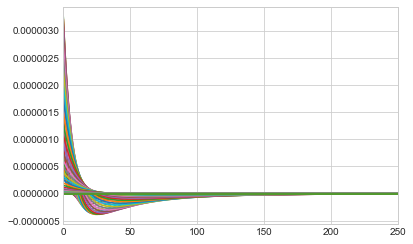

In [395]:
it = 360
ik = 500
for ik in range(513):
    plt.plot(quick[:,it,ik] - umist[:,it,ik])
    
plt.xlim(0, 250)

In [393]:
moment_quick = dz_grid*np.sum(mid_grid[:,None]*np.sum(quick, axis = 2), axis = 0)
moment_umist = dz_grid*np.sum(mid_grid[:,None]*np.sum(umist, axis = 2), axis = 0)

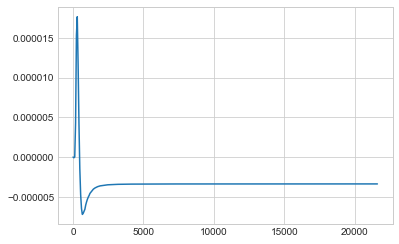

In [394]:
plt.plot(times_grid, moment_quick - moment_umist)
#plt.plot(times_grid, moment_umist)
#plt.ylim(0.015, 0.02)

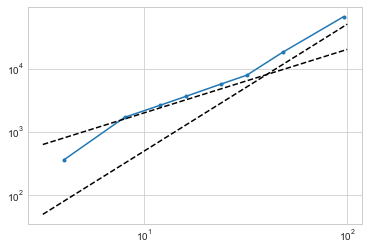

In [25]:
classes = [4, 8, 12, 16, 24, 32, 48, 96]
runtimes = [359, 1699, 2638, 3626, 5715, 7844, 17988, 65740]

x = np.logspace(0.5, 2, 10)

plt.plot(classes, runtimes, marker = '.')

plt.plot(x, 200*x**1., '--', c = 'k')
plt.plot(x, 5*x**2., '--', c = 'k')

plt.xscale('log')
plt.yscale('log')

In [104]:
16 * 25 / 19

21.05263157894737